<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">
بخش ۲) میزان رضایت از یک جنبه‌ی مشخص
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<div dir='rtl'>
فرض کنید می‌خواهیم نظراتی که در آن‌ها درباره‌ی ضمانت کالا (گارانتی، وارانتی و غیره) صحبت شده را برای هر محصول پیدا کرده و میانگین امتیاز (overall) کاربران را پیدا کنیم. این بدین معنی‌ست که قصد داریم تقریبی از میزان رضایت کاربران را درباره‌ی ضمانت کالای مربوطه به دست آوریم. یک راه ساده این است که به‌ازای هر نظر ثبت‌شده برای یک محصول دقیقاً به دنبال کلماتی مثل warranty یا guarantee بگردیم و اگر چنین کلمه‌ای وجود داشت در نتیجه در آن نظر درباره‌ی این جنبه از کالا بحث شده است. 

اما چنین روشی نمی‌تواند واقعا تمام داده‌های مورد نظر را پیدا کند زیرا که ممکن است در متن کاربر، کلمات مشابه یا مترادف دیگری به‌جای این کلمه استفاده شده باشد، یا حتی ممکن است فرد در نوشتار این کلمه غلط تایپی داشته باشد.   
یک راه پیشنهادی برای حل این مسئله این است که ابتدا به کمک بردارهای تعبیه (به‌عنوان مثال بردار word2vec یا بردارهای از پیش‌آموخته‌ی مدل‌های زبانی عظیم مثل GPT یا Cohere)، کلمات مشابه warranty یا guarantee را نیز پیدا کرده و سپس علاوه بر دو کلمه‌ی اصلی، به دنبال چنین کلماتی نیز بگردید. فراموش نکنید که غلط‌های املایی ممکن و رایج را نیز در نظر بگیرید.

بنابراین در این بخش نیاز است ابتدا به‌ازای هر دو کلمه، کلمات مشابه آن‌ها را توسط این روش پیدا کرده، سپس نظراتی که در آن‌ها حداقل یکی از این کلمات ظاهر شده بود را جدا کرده و در نهایت طبق این داده‌ی فیلترشده، میانگین امتیاز هر کالا را محاسبه و گزارش کنید.
نکته: راه‌حل شرح‌داده‌شده صرفاً یک راه‌حل ساده‌ی پیشنهادی بوده و اگر علاقه دارید از روش خلاقانه‌ی دیگری بهره ببرید با تایید منتور بلامانع است و در صورت بهتر بودن رویکرد شما شامل نمره‌ی اضافه نیز خواهد شد.
</div>
</font>
</p>

#### Keyword Extraction

In [1]:
from gensim.models import KeyedVectors
import pickle


In [2]:
model = KeyedVectors.load_word2vec_format("../data/Word2Vec/GoogleNews-vectors-negative300.bin.gz", binary=True)


In [8]:
similar_words_warranty = model.most_similar('warranty', topn=10)
similar_words_warranty

[('warranties', 0.8235853910446167),
 ('warrantee', 0.781966507434845),
 ('Warranty', 0.7335840463638306),
 ('lifetime_warranty', 0.697948157787323),
 ('Limited_Warranty', 0.6898940205574036),
 ('extended_warranties', 0.6476331353187561),
 ('warrantees', 0.6356005072593689),
 ('warrenty', 0.6332387924194336),
 ('five-year/###_,###_mile', 0.6254701018333435),
 ('Lifetime_Warranty', 0.6205177903175354)]

In [7]:
similar_words_guarantee = model.most_similar('guarantee', topn=10)
similar_words_guarantee

[('guarantees', 0.822723925113678),
 ('guaranteed', 0.7438113689422607),
 ('guaranteeing', 0.7005587816238403),
 ('assure', 0.5853263735771179),
 ('assurances', 0.5550788044929504),
 ('ensure', 0.5258521437644958),
 ('Guarantee', 0.5235120058059692),
 ('assurance', 0.5162608027458191),
 ('insure', 0.5105894804000854),
 ('Disclaimer_Past_performance', 0.5068185329437256)]

In [9]:
similar_words_warranty = [x[0] for x in similar_words_warranty]
similar_words_guarantee = [x[0] for x in similar_words_guarantee]
keywords = similar_words_warranty + similar_words_guarantee

In [10]:
# asked chat GPT for 20 words and phrases similar to warranty
warranty_keywords = [
    "guarantee",
    "return policy",
    "refund policy",
    "replacement policy",
    "service contract",
    "extended warranty",
    "coverage",
    "protection plan",
    "repair coverage",
    "satisfaction guarantee",
    "money-back guarantee",
    "product assurance",
    "manufacturer's warranty",
    "defect coverage",
    "limited warranty",
    "lifetime warranty",
    "customer support",
    "after-sales service",
    "product support",
    "liability coverage"
]


In [12]:
common_typos = [
    "warrenty", "guarentee", "gaurantee", "waranty", "replacment policy",
    "service contrakt", "moneyback guarantee", "costomer support", "refound policy"
]

In [13]:
keywords = similar_words_guarantee + similar_words_warranty + warranty_keywords + common_typos

In [3]:
for x in keywords:
    print(x)

guarantees
guaranteed
guaranteeing
assure
assurances
ensure
Guarantee
assurance
insure
Disclaimer_Past_performance
warranties
warrantee
Warranty
lifetime_warranty
Limited_Warranty
extended_warranties
warrantees
warrenty
five-year/###_,###_mile
Lifetime_Warranty
guarantee
return policy
refund policy
replacement policy
service contract
extended warranty
coverage
protection plan
repair coverage
satisfaction guarantee
money-back guarantee
product assurance
manufacturer's warranty
defect coverage
limited warranty
lifetime warranty
customer support
after-sales service
product support
liability coverage
warrenty
guarentee
gaurantee
waranty
replacment policy
service contrakt
moneyback guarantee
costomer support
refound policy


In [14]:
with open("keywords.pkl", "wb") as f:
    pickle.dump(keywords, f)

#### Using Keywords to Filter the Dataset

In [17]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from tqdm import tqdm
from scipy import stats


In [3]:
with open('keywords.pkl', 'rb') as f:
    keywords = pickle.load(f)

In [4]:
def contains_warranty_related_text(review, keywords, threshold=90):
    review = review.lower()
    for keyword in keywords:
        score = fuzz.partial_ratio(review, keyword.lower())
        if score >= threshold:
            return True
    return False

In [5]:
file_path = "../data/raw/train_data.csv"  

review_column = "reviewText"
rating_column = "overall"

chunk_size = 10000
total_rating = 0
match_count = 0

matched_rows = []
chunk_averages = []
chunk_num = 1
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    for idx, row in chunk.iterrows():
        review = row.get(review_column, "")
        rating = row.get(rating_column, None)

        if pd.notnull(rating) and contains_warranty_related_text(review, keywords):
            total_rating += float(rating)
            match_count += 1
            matched_rows.append(review)

        print(f'chunk: {chunk_num}, row number: {idx}', end='\r')
    if match_count > 0:
        avg_rating = total_rating / match_count
        print(f"Average rating for chunck {chunk_num}: {avg_rating:.2f}")
        chunk_averages.append(avg_rating)
    else:
        print(f"No warranty-related reviews found for chunk {chunk_num}.")

    chunk_num += 1


Average rating for chunck 1: 3.97
Average rating for chunck 2: 3.79
Average rating for chunck 3: 3.68
Average rating for chunck 4: 3.71
Average rating for chunck 5: 3.66
Average rating for chunck 6: 3.56
Average rating for chunck 7: 3.47
Average rating for chunck 8: 3.48
Average rating for chunck 9: 3.46
Average rating for chunck 10: 3.44
Average rating for chunck 11: 3.43
Average rating for chunck 12: 3.42
Average rating for chunck 13: 3.41
Average rating for chunck 14: 3.39
Average rating for chunck 15: 3.37
Average rating for chunck 16: 3.36
Average rating for chunck 17: 3.33
Average rating for chunck 18: 3.33
Average rating for chunck 19: 3.31
Average rating for chunck 20: 3.32
Average rating for chunck 21: 3.32
Average rating for chunck 22: 3.32
Average rating for chunck 23: 3.32
Average rating for chunck 24: 3.31


KeyboardInterrupt: 

In [13]:
csv_path = '../data/raw/train_data.csv'  
total_rows = 838944                    # total number of rows (excluding header)
sample_size = 1000
num_iterations = 100

sample_means = []

for _ in tqdm(range(num_iterations), desc="Sampling"):
    # Generate rows to skip (randomly skip all except 1000)
    skip_rows = sorted(np.random.choice(np.arange(1, total_rows + 1), total_rows - sample_size, replace=False))

    # Read 1000 random rows
    df = pd.read_csv(csv_path, skiprows=skip_rows)

    # Filter warranty-related reviews
    filtered_df = df[df['reviewText'].apply(lambda x: contains_warranty_related_text(x, keywords))]

    # Compute sample mean rating
    if not filtered_df.empty:
        mean_rating = filtered_df['overall'].mean()
        sample_means.append(mean_rating)
    else:
        sample_means.append(np.nan)  # mark empty sample


Sampling: 100%|██████████| 100/100 [05:12<00:00,  3.13s/it]


In [14]:
sample_means = pd.DataFrame({'sample_mean': sample_means})
sample_means.to_csv('../data/processed/sample_means.csv', index=False)
sample_means.head()

,sample_mean
0,2.909091
1,3.583333
2,3.200000
3,3.562500
4,2.461538


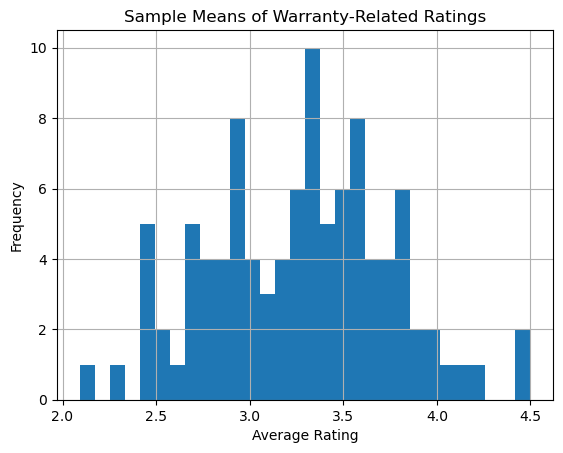

In [16]:

plt.hist(sample_means, bins=30)
plt.title("Sample Means of Warranty-Related Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [18]:
def confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    h = stats.t.ppf((1 + confidence) / 2., n-1) * sem
    return mean - h, mean + h

In [27]:
print(f'Confidence Interval: {confidence_interval(sample_means)}')
print(f'Average rating of warranty reviews: {sample_means.sample_mean.mean():.2f}')

Confidence Interval: (array([3.17153874]), array([3.36515201]))
Average rating of warranty reviews: 3.27


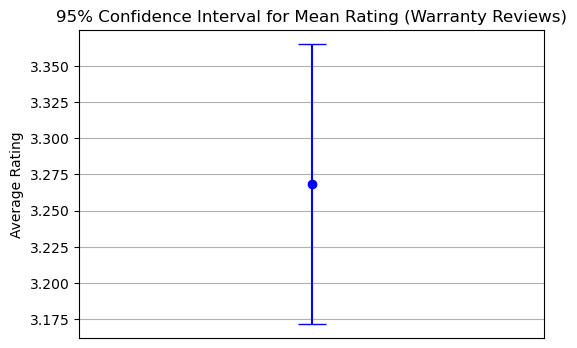

In [20]:
ci_lower, ci_upper = confidence_interval(sample_means)
margin_of_error = (ci_upper - ci_lower) / 2
plt.figure(figsize=(6, 4))
plt.errorbar(x=1, y=sample_means.mean(), yerr=margin_of_error, fmt='o', capsize=10, color='blue')
plt.xlim(0, 2)
plt.xticks([])
plt.ylabel('Average Rating')
plt.title('95% Confidence Interval for Mean Rating (Warranty Reviews)')
plt.grid(True)
plt.show()